# V.A Categorica

- Cada una de las N posibles salidas tiene un valor de probabilidad específico
- La forma mas usual de definirla es a través de un histograma
- Este tipo de representación se llama no paramétrica debido a que la V.A no queda definida con unos pocos parámetros sino que hay que definirla explicitamente

# Ejemplos

In [2]:
import numpy as np

In [3]:
# Usaremos un diccionario en python para definirla
X = {1: 0.1, 2: 0.3, 3: 0.5, 4:0.1}

In [4]:
# Verificamos que la suma sea 1
sum(X.values())

1.0

In [5]:
from matplotlib import pyplot as plt

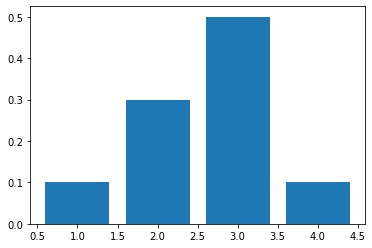

In [6]:
plt.bar(X.keys(), X.values())
plt.show()

In [7]:
np.log(4)

1.3862943611198906

## Cálculo de momentos y entropía de una V.A categórica

In [8]:
def mean(X):
    m = 0
    for x, p in X.items():
        m = m + x*p
    return m

In [9]:
mean(X)

2.6

In [10]:
def variance(X):
    m = mean(X)
    v = 0
    for x, p in X.items():
        v = v + (x-m)**2*p
    return v

In [11]:
variance(X)

0.64

In [12]:
def entropy(X, normalize = True):
    e = 0
    for _, p in X.items():
        e = e - np.log(p)* p
    if normalize:
        e = e/np.log(len(X))
    else:
        e = e/np.log(2)
    return e

In [13]:
entropy(X, normalize=True)/np.log(4)

0.6079067132126817

## Que idea intuitiva nos da la varianza o el desvio estandard? y la entropía?
### Cual es mejor medida para la incertidumbre?

In [14]:
def analize_VA(X, normalize=True):
    #assert sum(X.values()) == 1
    plt.bar(X.keys(), X.values())
    plt.show()
    print('Media:', mean(X))
    if normalize:
        print('Entropía normalizada:', entropy(X, normalize=normalize))
    else:
        print('Entropía:', entropy(X, normalize=normalize))
    print('Varianza:', variance(X))

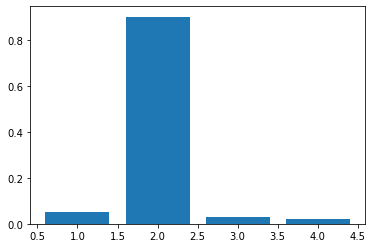

Media: 2.02
Entropía normalizada: 0.3087715616560074
Varianza: 0.15960000000000002


In [15]:
X_1 = {1: 0.05, 2: 0.9, 3: 0.03, 4:0.02}
analize_VA(X_1)

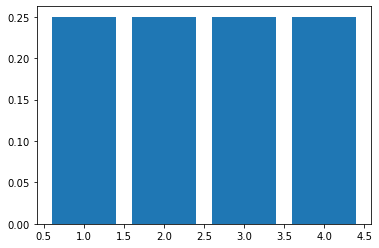

Media: 2.5
Entropía normalizada: 1.0
Varianza: 1.25


In [18]:
X_2 = {1: 0.25, 2: 0.25, 3: 0.25, 4:0.25}
analize_VA(X_2)

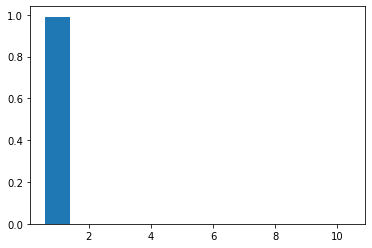

Media: 1.0449999999999997
Entropía normalizada: 0.030891008405092145
Varianza: 0.282975


In [17]:
X_3 = {1: 0.991, 2: 0.001, 3: 0.001, 4:0.001, 5:0.001, 6:0.001, 7:0.001, 8:0.001, 9:0.001, 10:0.001}
analize_VA(X_3)

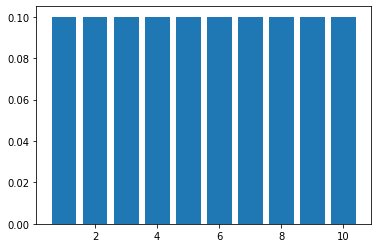

Media: 5.500000000000001
Entropía normalizada: 0.9999999999999998
Varianza: 8.25


In [20]:
X_4 = {1: 0.1, 2: 0.1, 3: 0.1, 4:0.1, 5:0.1, 6:0.1, 7:0.1, 8:0.1, 9:0.1, 10:0.1}
analize_VA(X_4)

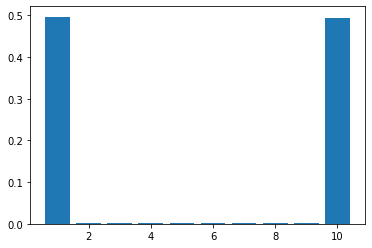

Media: 5.4910000000000005
Entropía normalizada: 0.32608130132741736
Varianza: 20.129919


In [21]:
X_5 = {1: 0.497, 2: 0.001, 3: 0.001, 4:0.001, 5:0.001, 6:0.001, 7:0.001, 8:0.001, 9:0.001, 10:0.495}
analize_VA(X_5)

# Intuición de la entropía

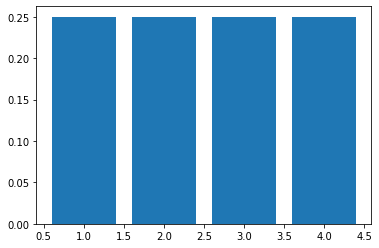

Media: 2.5
Entropía: 2.0
Varianza: 1.25


In [22]:
X = {1: 0.25, 2: 0.25, 3: 0.25, 4:0.25}
analize_VA(X, normalize=False)

Dado que realicé el experimento y tengo que adivinar cual fue la observación:

¿Cúal es la cantidad de preguntas promedio que deberia hacer para adivinar la salida?

Es mayor a 2.5?  
- si -> Es 3?  
- No -> Es 1?

Con dos preguntas encuentro resultado

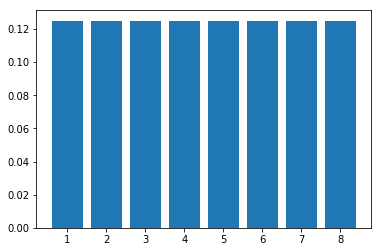

Media: 4.5
Entropía: 3.0
Varianza: 5.25


In [217]:
X = {1: 0.125, 2: 0.125, 3: 0.125, 4:0.125, 5: 0.125, 6: 0.125, 7: 0.125, 8:0.125}
analize_VA(X, normalize=False)

Es mayor a 4.5?
- si -> Es mayor a 6.5?:
    - Si -> es 7?
    - No -> es 5?
- no -> Es menor a 2.5?:
    - Si -> es 1?
    - No -> es 3?

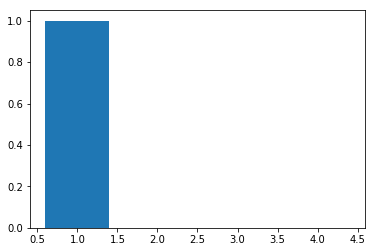

Media: 1.0000001385
Entropía: 1.0205288417267646e-06
Varianza: 3.134999890169505e-07


In [196]:
# Caso extremo:
X = {1: 0.99999999, 2: 0.0000000033, 3: 0.0000000033, 4: 0.000000033}
analize_VA(X, normalize=False)

Cuantas preguntas necesito hacer para adivinar?

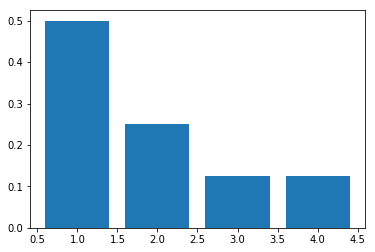

Media: 1.875
Entropía: 1.75
Varianza: 1.109375


In [198]:
X = {1: 0.5, 2: 0.25, 3: 0.125, 4:0.125}
analize_VA(X, normalize=False)

Es 1?
- Si -> Resuelto
- No -> Es 2?
    - Si -> Resuelto
    - No -> Es 3?
        - Si o No Resuelto

In [202]:
1 * 0.5 + 2 * 0.25 + 3 * 0.125 + 3 * 0.125

1.75

# Modelo generador de una V.A Categórica

In [7]:
X = {1: 0.1, 2: 0.3, 3: 0.5, 4:0.1}

In [8]:
X.keys(), X.values()

(dict_keys([1, 2, 3, 4]), dict_values([0.1, 0.3, 0.5, 0.1]))

In [9]:
observaciones = np.random.choice(list(X.keys()), size = 1000, p = list(X.values()))

In [22]:
observaciones

array([3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 1, 3, 2, 3, 3, 1, 3, 2, 2, 3, 4,
       2, 3, 2, 3, 3, 2, 3, 2, 3, 4, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 4, 2, 3, 2, 1, 4, 4, 3, 4, 2, 2, 3, 1, 4, 3, 1, 3,
       3, 3, 1, 1, 2, 1, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 4, 4, 3, 4,
       3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       2, 3, 2, 3, 2, 4, 1, 2, 4, 2, 3, 2, 4, 3, 2, 1, 3, 2, 4, 3, 4, 3,
       1, 1, 3, 1, 2, 2, 2, 2, 1, 4, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 2, 2,
       2, 3, 4, 3, 3, 3, 2, 3, 3, 1, 3, 3, 2, 4, 2, 1, 3, 3, 2, 1, 2, 2,
       3, 2, 3, 2, 2, 4, 3, 1, 1, 1, 3, 3, 3, 4, 2, 2, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4,
       3, 3, 4, 3, 3, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 1, 2,
       4, 1, 3, 3, 3, 1, 4, 2, 2, 1, 2, 1, 1, 1, 3, 3, 3, 2, 3, 3, 1, 2,
       2, 3, 3, 3, 2, 2, 3, 4, 3, 4, 4, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3,
       3, 1, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 1, 2, 3,

# Estimar la función de masa de probabilidad de las observaciones

In [11]:
from collections import Counter
Counter(observaciones)

Counter({3: 492, 2: 307, 1: 103, 4: 98})

Histograma

In [21]:
np.histogram(observaciones, bins=4, range=[1,5])

(array([103, 307, 492,  98]), array([1., 2., 3., 4., 5.]))

Tener en cuenta que toma como primer intervalo [1, 2), como segundo [2,3), y asi hasta el ultimo [4, 5)

donde "[" es incluido y ")" es excluido

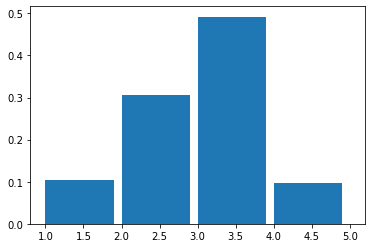

In [23]:
hist = plt.hist(observaciones, bins=4, range=[1,5], width=0.9, density=True) # normed='density')

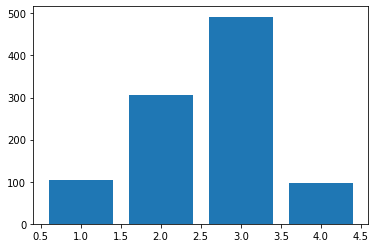

NameError: name 'mean' is not defined

In [26]:
analize_VA({3: 492, 2: 307, 1: 103, 4: 98})

In [35]:
hist

(array([0.108, 0.303, 0.489, 0.1  ]),
 array([1., 2., 3., 4., 5.]),
 <a list of 4 Patch objects>)

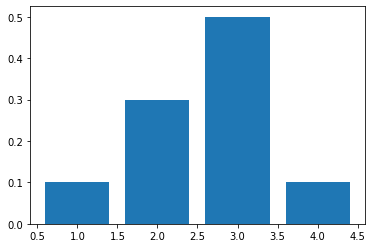

Media: 2.6
Entropía normalizada: 0.8427376486136672
Varianza: 0.64


In [36]:
# Esta es la Ground Truth
analize_VA(X)